In [8]:
import large_vocab_adt_dafx2018.model as model

In [2]:
import pickle
import os
import numpy as np
import glob
from keras import backend as K
from large_vocab_adt_dafx2018.transcribe import transcribe, PERC_VOICE_SET
import soundfile as psf

In [3]:
import matplotlib.pyplot as plt
import librosa.display

%matplotlib inline

In [4]:
input_audio_file = 'example.wav'

# Model 303 is the Small, Multi-task model trained on real + synth, with classes weighted by entropy
#
# Other models:
# MT-S-R (289)
# MT-S-S (290)
# MT-S-R+S (291)
# MT-L-R (292)
# MT-L-S (293)
# MT-L-R+S (294)
# 14VST-S-R+S (295)
# 3VST-S-R+S (301)
# BTST-S-R+S (302)
# 14VST-S-R+S-Eweight (303)
model_definition_path = 'large_vocab_adt_dafx2018/trained_models/303_s0_def.json'
model_weights_path = 'large_vocab_adt_dafx2018/trained_models/303_s0_weights.h5'
model_configuration_id = 303
sample_audio_files = dict([(v, os.path.join('audio/', '{}.wav'.format(v))) for v in PERC_VOICE_SET])

In [5]:
def plot_activations(X, voice_type, start_s, stop_s, sample_interval, sr=44100, size=(15,5)):
    sample_interval = int(round(sample_interval * sr)) / float(sr)
    hop_length = int(sample_interval * sr)
    start_idx = int(start_s / sample_interval)
    stop_idx = int(stop_s / sample_interval)
    plt.figure(figsize=size)
    librosa.display.specshow(X[start_idx:stop_idx,:].T, 
                             sr=sr, 
                             hop_length=hop_length,
                             x_axis='time')
    
    if voice_type == 'full':
        labels = ['Kick Drum',
                  'Snare',
                  'Snare Rim',
                  'Crash',
                  'Ride',
                  'Open Hi-Hat',
                  'Closed Hi-Hat',
                  'Low Tom',
                  'Mid Tom',
                  'High Tom',
                  'Conga / Bongo',
                  'Clap',
                  'Bell',
                  'Clave']
    else:
        labels = ['Kick Drum',
                  'Snare',
                  'Hi-Hat']        
    plt.yticks(np.arange(X.shape[1]) + 0.5, labels)

# Transcribe

In [9]:
output = transcribe(model_definition_path,
                    model_weights_path,
                    input_audio_file,
                    model_configuration_id,
                    sample_audio_files,
                    synthesize=True,
                    peak_params=None,
                    output_sample_rate=44100)

Single output


# Plot activations

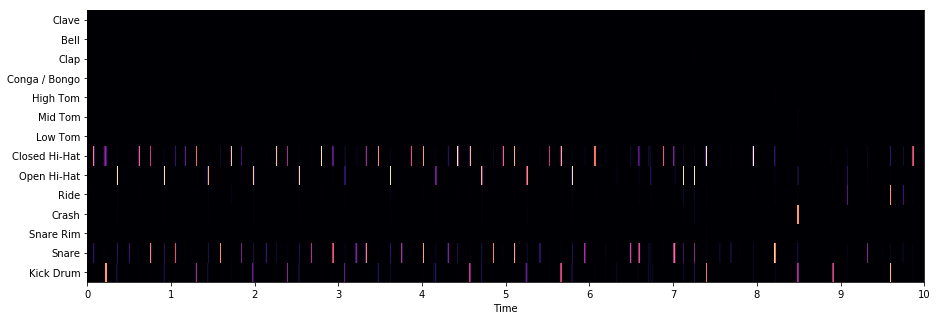

In [7]:
plot_activations(output['14v']['onset_activations'], 'full', 0, 10, 0.01)

# Annotations

In [16]:
# annotations are in the jam output
print(output['14v']['jam'].annotations[0].sandbox.perc_voice)
output['14v']['jam'].annotations[0].data

kicks


,time,duration,value,confidence
0,00:00:00.220498,0 days,0.628041,None
1,00:00:00.350793,0 days,0.628041,None
2,00:00:00.922086,0 days,0.628041,None
3,00:00:01.302947,0 days,0.628041,None
4,00:00:01.443265,0 days,0.628041,None
5,00:00:01.984489,0 days,0.628041,None
6,00:00:02.395419,0 days,0.628041,None
7,00:00:03.086984,0 days,0.628041,None
8,00:00:03.487891,0 days,0.628041,None
9,00:00:04.169433,0 days,0.628041,None


# Resynthesized audio

In [17]:
from IPython.display import display, Audio

In [18]:
Audio(output['14v']['mixed_audio'], rate=44100)